# **Modèles linéaires: Prédiction de revenue**

## **I) Chargement et préparation des données**

In [ ]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Charger les données
data = pd.read_csv('sales_data.csv', sep = ',')

Ces données sont des données synthétiques de ventes.

In [ ]:
# Afficher les premières lignes
data.head()

,price,quantity_sold,product_type,month
0,43.708611,43,Product_D,Jun
1,95.564288,59,Product_A,Feb
2,75.879455,57,Product_D,Nov
3,63.879264,54,Product_A,Mar
4,24.041678,44,Product_E,Jun


In [ ]:
# Informations sur les types et les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1000 non-null   float64
 1   quantity_sold  1000 non-null   int64  
 2   product_type   1000 non-null   object 
 3   month          1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [ ]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

price            0
quantity_sold    0
product_type     0
month            0
dtype: int64


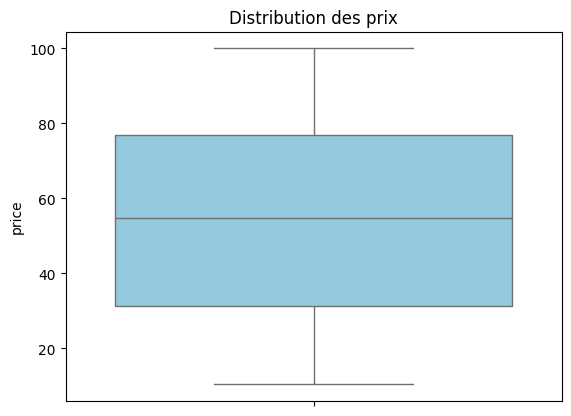

In [ ]:
# Détection des anomalies ou valeurs aberrantes
# Boxplot du prix
sns.boxplot(data=data['price'], color='skyblue')
plt.title('Distribution des prix')
plt.show()


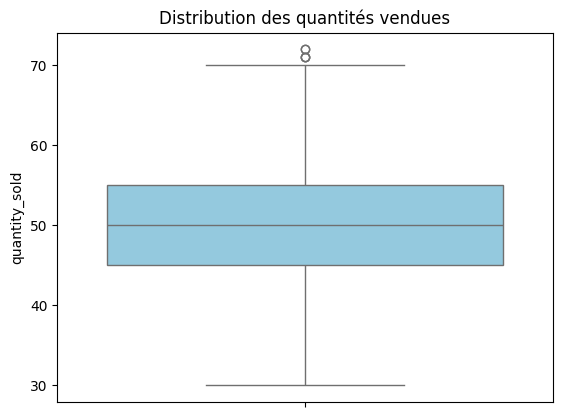

In [ ]:
# Boxplot des quantités vendues
sns.boxplot(data=data['quantity_sold'], color='skyblue')
plt.title('Distribution des quantités vendues')
plt.show()


Ces points au-dessus de la moustache supérieure (vers 72) représentent des valeurs aberrantes (outliers). Ce sont des quantités vendues significativement plus élevées que la majorité des autres valeurs de l'ensemble de données.

En résumé, la distribution des quantités vendues est centrée autour de la médiane de 50. La majorité des ventes se situent entre 45 et 55 (les 50 % centraux). La plupart des quantités vendues sont comprises entre 30 et 70. Il y a des ventes exceptionnelles (valeurs aberrantes) d'environ 72 qui sont notablement plus élevées que les autres.

In [ ]:
# Traitement des valeurs aberrantes
# Calcul des quartiles et de l'IQR pour la colonne 'quantity_sold'
Q1 = data['quantity_sold'].quantile(0.25)
Q3 = data['quantity_sold'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les valeurs acceptables
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes
data = data[(data['quantity_sold'] >= borne_inf) & (data['quantity_sold'] <= borne_sup)]

In [ ]:
# reinitialiser les index
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(995, 4)

In [ ]:
# Creation d'une nouvelle variable revunue
data['revenue'] = data['price'] * data['quantity_sold']

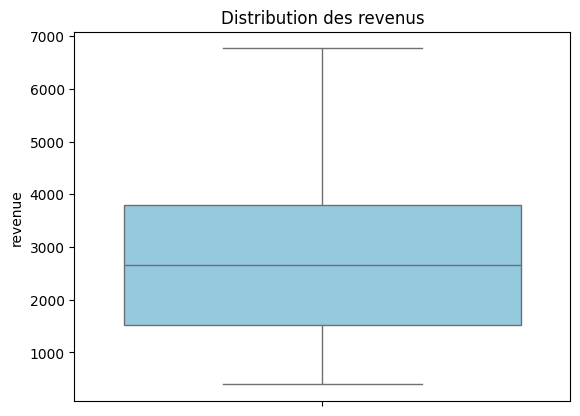

In [ ]:
# boxplot du revenue
sns.boxplot(data=data['revenue'], color='skyblue')
plt.title('Distribution des revenus')
plt.show()

## **II) Analyse exploratoire des données (EDA)**

### ***1. Analyse Univariée***

In [ ]:
# Statistiques descriptives
data.describe(include="all")

,price,quantity_sold,product_type,month,revenue
count,995.000000,995.000000,995,995,995.000000
unique,NaN,NaN,5,12,NaN
top,NaN,NaN,Product_D,Jul,NaN
freq,NaN,NaN,215,108,NaN
mean,54.168533,49.962814,NaN,NaN,2707.007045
std,26.290430,7.078293,NaN,NaN,1385.992723
min,10.416882,30.000000,NaN,NaN,390.956059
25%,31.351415,45.000000,NaN,NaN,1524.530176
50%,54.752366,50.000000,NaN,NaN,2646.550393
75%,77.022360,55.000000,NaN,NaN,3799.164349


Ce tableau présente des statistiques descriptives pour plusieurs variables issues d'un ensemble de données de ventes.

**Variables Numériques (`price`, `quantity_sold`, `revenue`)**

*  Pour nos variables `price`, `quantity_sold`, et `revenue`, il y a 995 observations complètes.
* **Moyenne :**
    * `price` : Le prix moyen est d'environ 54.17.
    * `quantity_sold` : La quantité moyenne vendue est d'environ 49.96.
    * `revenue` : Le revenu moyen est d'environ 2707.01.
* **L'écart-type :**
    * `price` : L'écart-type est d'environ 26.29, ce qui suggère une variabilité modérée des prix.
    * `quantity_sold` : L'écart-type est d'environ 7.08, indiquant que les quantités vendues sont relativement regroupées autour de la moyenne.
    * `revenue` : L'écart-type est d'environ 1385.99, ce qui montre une variabilité importante des revenus.
* **La valeur minimale observée :**
    * `price` : Le prix minimum est d'environ 10.42.
    * `quantity_sold` : La quantité minimum vendue est de 30.00.
    * `revenue` : Le revenu minimum est d'environ 390.96.
* **25% (Premier Quartile - Q1) :**
    * `price` : 25 % des prix sont inférieurs ou égaux à environ 31.35.
    * `quantity_sold` : 25 % des quantités vendues sont inférieures ou égales à 45.00.
    * `revenue` : 25 % des revenus sont inférieurs ou égaux à environ 1524.53.
* **50% (Médiane - Q2) :**
    * `price` : Le prix médian est d'environ 54.75.
    * `quantity_sold` : La quantité médiane vendue est de 50.00.
    * `revenue` : Le revenu médian est d'environ 2646.55.
* **75% (Troisième Quartile - Q3) :**
    * `price` : 75 % des prix sont inférieurs ou égaux à environ 77.02.
    * `quantity_sold` : 75 % des quantités vendues sont inférieures ou égales à 55.00. (Cela correspond au 3ème quartile observé dans le box plot précédent).
    * `revenue` : 75 % des revenus sont inférieurs ou égaux à environ 3799.16.
* **La valeur maximale observée :**
    * `price` : Le prix maximum est d'environ 99.97.
    * `quantity_sold` : La quantité maximum vendue est de 70.00.
    * `revenue` : Le revenu maximum est d'environ 6768.30.

**Variables Catégorielles (`product_type`, `month`)**

* Le nombre d'observations non manquantes est 995 pour les deux variables.
* **catégories :**
    * `product_type` : Il y a 5 types de produits uniques.
    * `month` : Il y a 12 mois uniques.
* **Le mode :**
    * `product_type` : Le type de produit le plus fréquent est 'Product\_D'.
    * `month` : Le mois le plus fréquent est 'Jul' (Juillet).
* **Fréquence :**
    * `product_type` : 'Product_D' apparaît 215 fois.
    * `month` : 'Jul' apparaît 108 fois.

**Synthèse :**

* Les données portent sur 995 transactions ou observations.
* Les prix varient entre environ 10.42 et 99.97, avec une moyenne d'environ 54.17 et une médiane proche (54.75), suggérant une distribution relativement symétrique des prix.
* Les quantités vendues sont principalement comprises entre 45 et 55 (l'IQR), avec une médiane de 50. La plupart des ventes se situent entre 30 et 70. L'écart-type de 7.08 confirme que les quantités vendues sont moins dispersées que les prix ou les revenus.
* Il y a 5 types de produits distincts, avec 'Product_D' étant le plus vendu.
* Les ventes sont réparties sur 12 mois, avec un pic en Juillet.
* Les revenus varient considérablement, de 390.96 à 6768.30, avec une moyenne d'environ 2707.01. Le large écart-type (1385.99) et la différence entre la moyenne et la médiane (2646.55) suggèrent une distribution des revenus potentiellement asymétrique ou la présence de valeurs extrêmes élevées.

Ces statistiques donnent un bon aperçu central, de la dispersion et de la forme approximative de la distribution pour chaque variable.

a) Variable quantitative

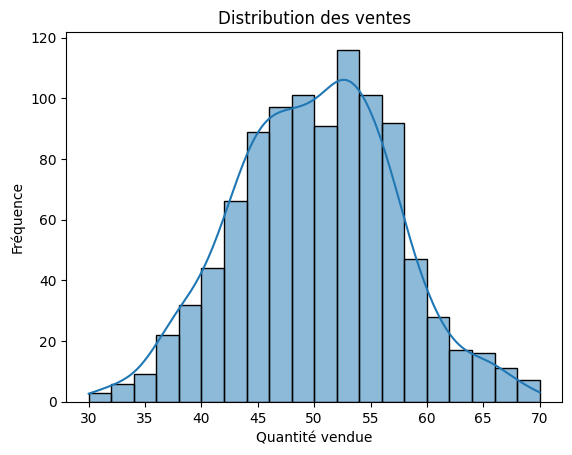

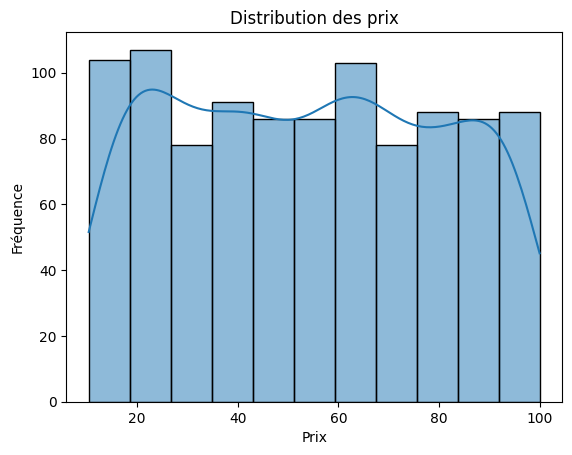

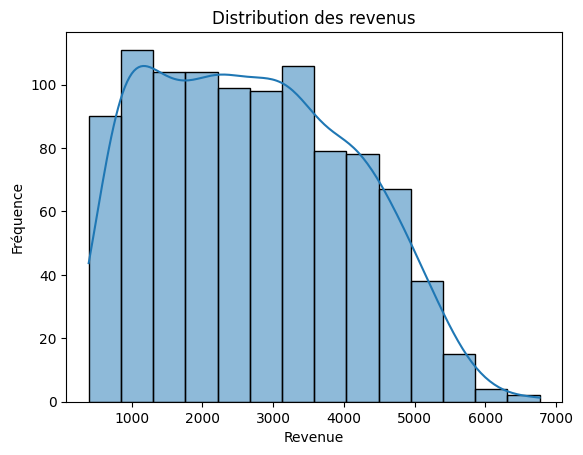

In [ ]:
# Visualisation des distributions
# Histogramme des quantités vendues
sns.histplot(data['quantity_sold'], kde=True)
plt.title('Distribution des ventes')
plt.xlabel('Quantité vendue')
plt.ylabel('Fréquence')
plt.show()

# Histogramme du prix
sns.histplot(data=data['price'], kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

# Histogramme du revenue
sns.histplot(data=data['revenue'], kde=True)
plt.title('Distribution des revenus')
plt.xlabel('Revenue')
plt.ylabel('Fréquence')
plt.show()

1. Distribution des ventes:
* La distribution des quantités vendues semble être **approximativement symétrique et unimodale** (elle présente un seul pic majeur).
* Le pic de l'histogramme se situe autour des valeurs de **50 à 55** sur l'axe des "Quantité vendue". Cela indique que les quantités vendues les plus fréquentes sont dans cette fourchette. La courbe de densité renforce cette observation, son sommet étant également situé dans cette zone.
* La forme générale de l'histogramme, suivie de près par la courbe de densité, ressemble à celle d'une **distribution normale (ou gaussienne)**. Cela suggère que la majorité des quantités vendues se regroupent autour de la moyenne, avec des fréquences diminuant à mesure que l'on s'éloigne du centre, de manière similaire des deux côtés.
* Les quantités vendues varient approximativement de **30 à 70**. Les fréquences sont faibles aux extrémités de cette plage et augmentent progressivement vers le centre.

2. la **Distribution des prix**:

* Contrairement au graphique précédent, la distribution des prix ne semble **pas suivre une forme simple comme une distribution normale**. Elle apparaît plutôt **irrégulière et potentiellement multi-modale**, c'est-à-dire qu'elle semble avoir plusieurs pics de fréquence.
* On observe plusieurs plages de prix où la fréquence est plus élevée. Les pics notables semblent se situer autour :
    * Des prix dans la vingtaine.
    * Des prix autour de 60-65.
    * Des prix autour de 90-95.
Entre ces pics, les fréquences sont plus basses.
* Les prix varient approximativement de **10 à 100**.
* La courbe de densité superposée confirme l'aspect ondulé de la distribution, reflétant la présence de plusieurs groupes de prix plus fréquents. Cela suggère qu'il n'y a pas une concentration unique des prix autour d'une seule valeur centrale, mais plutôt que certains intervalles de prix sont plus populaires que d'autres.

3. **Distribution des revenus**:

* La distribution des revenus est clairement **asymétrique et semble skewed vers la droite (asymétrie positive)**. Cela signifie qu'il y a une longue "queue" s'étendant vers les valeurs de revenus plus élevées, tandis que la majorité des observations (les revenus les plus fréquents) se concentrent dans les valeurs plus basses.
* Le pic le plus élevé de l'histogramme et de la courbe de densité se situe dans la plage de revenus allant d'environ **1000 à 2000**. C'est la gamme de revenus la plus fréquemment observée. On observe également des fréquences relativement élevées dans les plages de revenus autour de **3000-4000**.
* Les revenus observés varient approximativement de **0 à 7000**.
* La courbe de densité illustre bien l'asymétrie positive : elle monte rapidement vers le pic principal dans les revenus plus faibles, puis descend plus lentement vers les revenus plus élevés. Cela indique qu'il y a un grand nombre de transactions générant des revenus modestes, et un plus petit nombre de transactions générant des revenus beaucoup plus élevés.

En résumé, les quantités vendues suivent une distribution qui tend vers une forme de cloche, typique d'une distribution normale. Les ventes les plus courantes se situent entre 50 et 55 unités, et la grande majorité des ventes sont comprises entre 30 et 70 unités. Cette distribution semble bien se comporter sans forte asymétrie ou présence de multiples modes prononcés dans les données représentées par l'histogramme.
La distribution des prix n'est pas homogène ni unimodale. Il semble y avoir plusieurs gammes de prix distinctes ou stratégies de tarification qui se traduisent par des concentrations de transactions à différents niveaux de prix. Cela pourrait indiquer l'existence de différents types de produits, de gammes de qualité ou de stratégies de marché qui ciblent différents segments de prix.
La plupart des transactions génèrent des revenus relativement bas (entre 1000 et 2000 principalement). Cependant, il existe un certain nombre de transactions qui rapportent des revenus significativement plus élevés, étirant la distribution vers la droite. Cela est typique des données de revenus ou de richesse, où une minorité d'observations contribue de manière disproportionnée aux valeurs les plus élevées.

b) Variable qualitative

In [ ]:
# voir les valeurs uniques des variables qualitatives
print(data['product_type'].unique())
print(data['month'].unique())

['Product_D' 'Product_A' 'Product_E' 'Product_C' 'Product_B']
['Jun' 'Feb' 'Nov' 'Mar' 'Apr' 'Jan' 'Oct' 'Dec' 'Aug' 'Jul' 'Sep' 'May']


In [ ]:
#Ordonner les mois chronologiquement
mois_ordre = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['month'] = pd.Categorical(data['month'], categories=mois_ordre, ordered=True)

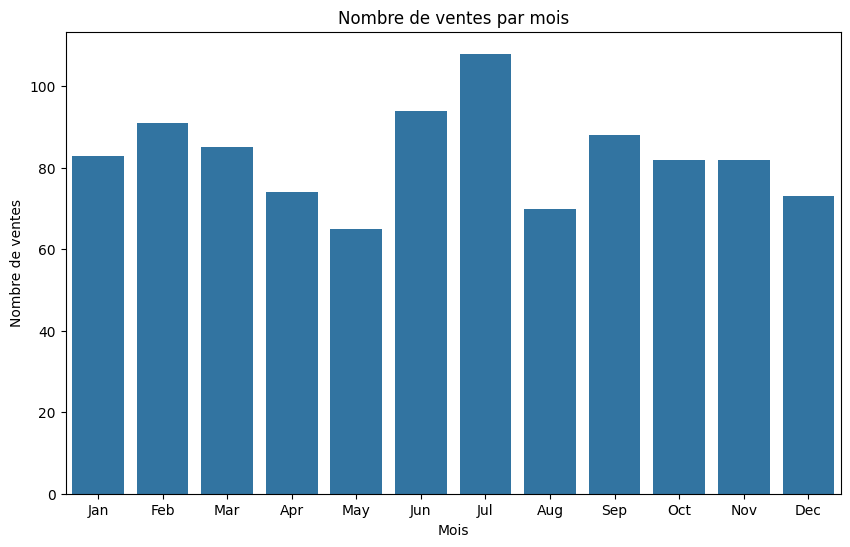

In [ ]:
# Analyse des pics de ventes
# barplot pour les mois
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month')
plt.title('Nombre de ventes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.show()

Ce diagramme à barres représentant le **Nombre de ventes par mois**. Il montre la variation du volume des ventes sur une période de douze mois, de janvier à décembre.
* Le nombre de ventes varie considérablement d'un mois à l'autre tout au long de l'année.
* Le mois de **juillet** enregistre le nombre de ventes le plus élevé, dépassant les 100 ventes. Cela suggère un pic d'activité commerciale pendant ce mois.
* En dehors de juillet, les mois de **février, mars, juin, septembre, octobre et novembre** affichent également un nombre de ventes relativement élevé, généralement compris entre 80 et 95.
* Les mois d'**avril, mai, août et décembre** montrent un nombre de ventes plus faible par rapport au reste de l'année, se situant environ entre 65 et 80.
* Le mois de **mai** semble être celui avec le nombre de ventes le plus bas.


On observe une tendance générale à une augmentation des ventes au printemps pour atteindre un pic en été (juin, juillet), suivie d'une légère baisse en août, puis d'un rebond en automne (septembre à novembre) avant une nouvelle diminution en décembre.

En somme, les ventes présentent une **forte saisonnalité**, avec un pic prononcé en juillet. Les mois d'été et d'automne sont généralement plus performants en termes de ventes que les mois de printemps et d'hiver (à l'exception notable de décembre). Cette analyse peut être utile pour la planification des stocks, les campagnes marketing ou la gestion des ressources en fonction des périodes de forte ou de faible activité.

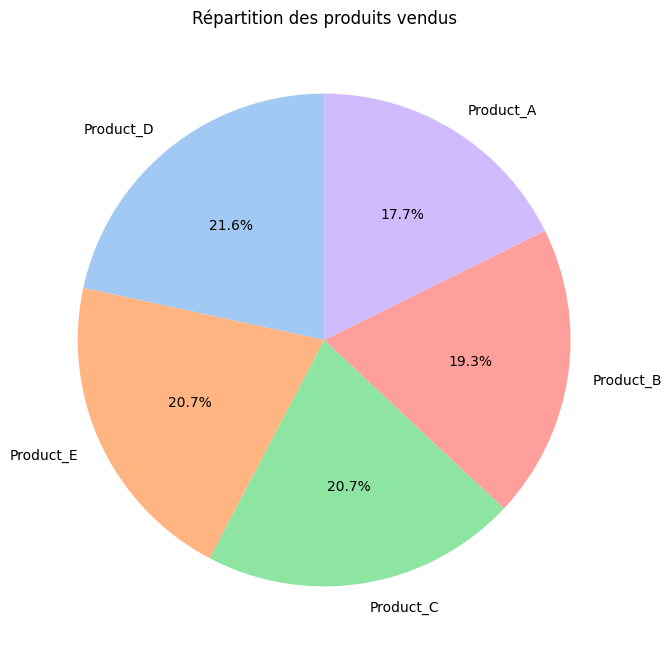

In [ ]:
# Diagramme circulaire des produits
product_counts = data['product_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Répartition des produits vendus')
plt.show()


Ce diagramme circulaire montre la proportion des ventes totales pour chaque catégorie de produit (Product_A, Product_B, Product_C, Product_D, Product_E).
* Le **Product_D** représente la plus grande part des ventes, avec **21.6%** du total.
* Le **Product_E** et le **Product_C** ont des parts de marché presque identiques, contribuant chacun à **20.7%** des ventes totales. Ils sont conjointement les deuxièmes produits les plus vendus après Product_D.
* Le **Product_B** représente **19.3%** des ventes, se situant juste derrière Product_E et Product_C.
* Le **Product_A** détient la plus petite part des ventes, avec **17.7%** du total.

Bien qu'il y ait des différences entre les produits, la répartition n'est pas extrêmement inégale. Les parts varient entre 17.7% et 21.6%, ce qui indique qu'aucun produit unique ne domine massivement les ventes, mais que plusieurs produits contribuent de manière significative au chiffre d'affaires global.

En résumé, les ventes sont réparties de manière relativement équilibrée entre les cinq types de produits, avec Product_D en tête, suivi de très près par Product_E et Product_C.

### ***2. Analyse Bivariée***

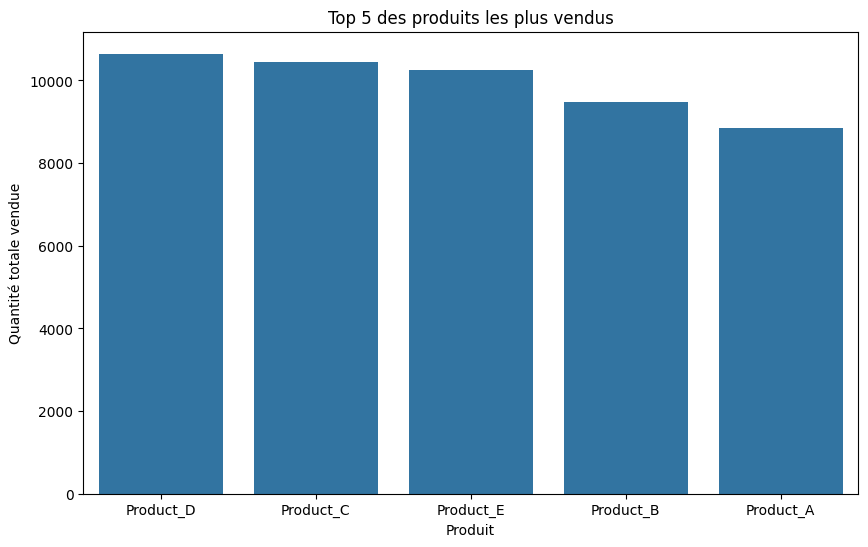

In [ ]:
# produits les plus vendus
top_products = data.groupby('product_type')['quantity_sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 des produits les plus vendus')
plt.xlabel('Produit')
plt.ylabel('Quantité totale vendue')
plt.show()

Ce diagramme à barres intitulé **"Top 5 des produits les plus vendus"**, présente la quantité totale vendue pour les cinq produits les plus populaires.
* Le graphique classe clairement les cinq produits les plus vendus en fonction de la quantité totale écoulée.
* Le **Product_D** est le produit le plus vendu, avec une quantité totale vendue légèrement supérieure à 10 500 unités.
* Le **Product_C** arrive en deuxième position, avec une quantité totale vendue légèrement au-dessus de 10 250 unités.
* Le **Product_E** se classe troisième, avec une quantité totale vendue d'environ 10 200 unités. La différence de quantité vendue entre Product_C et Product_E est très faible.
* Le **Product_B** est le quatrième produit le plus vendu parmi ce top 5, avec une quantité totale vendue d'environ 9 500 unités.
* Le **Product_A** est le cinquième produit de ce classement, avec une quantité totale vendue d'environ 8 800 unités.

En somme, ce graphique met en évidence que **Product_D, Product_C et Product_E sont les trois produits les plus performants en termes de volume de ventes**, avec des quantités totales vendues assez proches les unes des autres. Product_B et Product_A suivent derrière, avec des volumes de ventes moindres mais toujours significatifs pour figurer dans le top 5. Ce classement confirme l'information donnée par le graphique circulaire précédent concernant la répartition des ventes, en quantifiant ici les volumes réels pour les produits les plus vendus.

<ipython-input-20-7fde6ebc9e9c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = data.groupby('month')['quantity_sold'].sum()


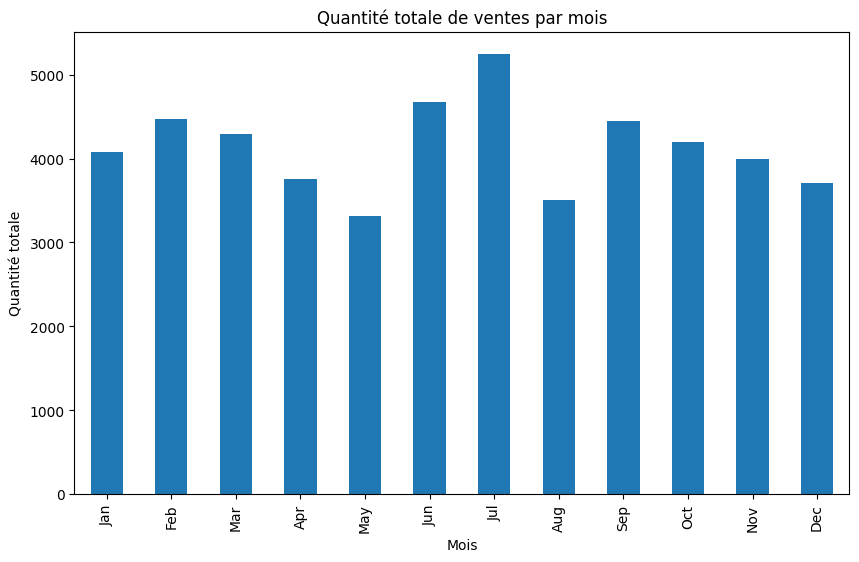

In [ ]:
# Quantité totale de ventes par mois
monthly_sales = data.groupby('month')['quantity_sold'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title("Quantité totale de ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Quantité totale")
plt.show()

Ce diagramme représente la somme des quantités de produits vendus pour chaque mois de l'année.

* Comme le graphique précédent sur le nombre de ventes par mois, ce graphique montre une forte variabilité saisonnière dans la quantité totale de produits vendus par mois.
* Le mois de **juillet** enregistre la quantité totale de ventes la plus élevée, atteignant un pic juste au-dessus de **5000 unités**.
* Les mois de **février, mars, juin, septembre, octobre et novembre** affichent également des quantités totales de ventes élevées, généralement comprises entre 4000 et 4500 unités.
* Les mois d'**avril, mai, août et décembre** montrent des quantités totales de ventes plus faibles, se situant principalement entre 3000 et 4000 unités.
* Le mois de **mai** enregistre la quantité totale de ventes la plus basse, s'approchant de 3300 unités.


La tendance générale observée dans la quantité totale de ventes par mois est très similaire à celle du nombre de transactions par mois. Cela suggère que la saisonnalité affecte à la fois le nombre de fois où des achats sont effectués et le volume total de produits achetés. Les mois avec plus de transactions sont également les mois où un plus grand nombre d'unités sont vendues au total.

En résumé, la quantité totale de produits vendus suit un schéma saisonnier marqué, culminant en juillet. Il y a une activité de vente importante au printemps tardif et en automne, avec des volumes plus faibles au début du printemps, en août et en décembre. Ce graphique confirme l'importance de la saison estivale (en particulier juillet) et de la période automnale pour les volumes de ventes.

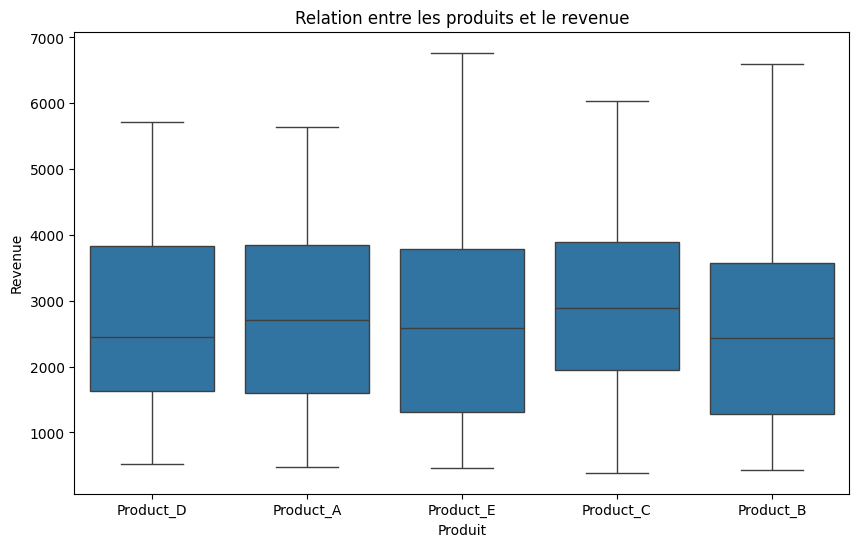

In [ ]:
# relation entre les produits et le revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_type', y='revenue', data=data)
plt.title('Relation entre les produits et le revenue')
plt.xlabel('Produit')
plt.ylabel('Revenue')
plt.show()

Ce graphique est une série de boîtes à moustaches (box plots) montrant la **Relation entre les produits et le revenue**. Il visualise la distribution des revenus générés par chaque type de produit (Product_D, Product_A, Product_E, Product_C, Product_B). Chaque boîte à moustaches résume la distribution des revenus pour un produit spécifique.

* La ligne au centre de chaque boîte représente la médiane du revenu pour ce produit.
    * Le **Product_C** semble avoir la médiane de revenu la plus élevée, légèrement au-dessus de 3000.
    * Le **Product_D** et le **Product_A** ont des médianes de revenus similaires, autour de 2700-2800.
    * Le **Product_E** a une médiane légèrement inférieure, autour de 2500.
    * Le **Product_B** a la médiane de revenu la plus basse, autour de 2400-2500.

    Cela suggère que, bien que Product_D soit le plus vendu en quantité (vu dans un graphique précédent), le **revenu typique (médian)** généré par une transaction pour Product_C est plus élevé que pour les autres produits.

* Les moustaches montrent la plage des revenus, à l'exclusion des valeurs aberrantes.
    * Tous les produits présentent une large gamme de revenus, s'étendant approximativement de moins de 500 (pour certains) jusqu'à environ 5500-6500.
    * Les moustaches supérieures pour **Product_C et Product_B** semblent atteindre des valeurs légèrement plus élevées que pour les autres, suggérant des revenus potentiellement plus élevés, même en dehors des valeurs aberrantes.


**En synthèse :**

Ce graphique révèle des différences importantes dans la distribution des revenus selon le type de produit. Bien que Product_D soit le leader en volume de ventes, le revenu médian par transaction est plus élevé pour Product_C. Cela pourrait signifier que Product_C est vendu à un prix unitaire plus élevé, ou que les transactions impliquant Product_C tendent à inclure de plus grandes quantités pour les achats à forte valeur. Tous les produits montrent une variabilité considérable des revenus. Cette analyse est cruciale pour comprendre la rentabilité de chaque ligne de produits, au-delà du simple volume des ventes.

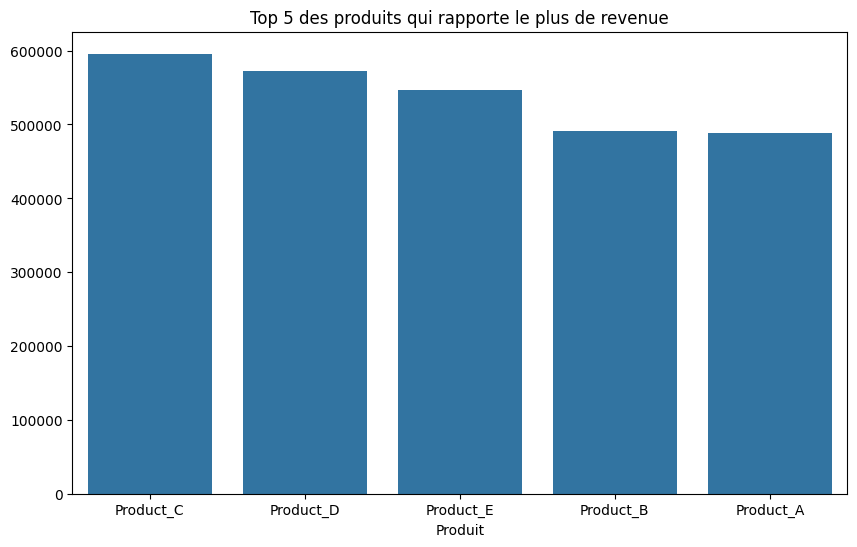

In [ ]:
# Produit qui rapporte plus de revenue
top_products = data.groupby('product_type')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 des produits qui rapporte le plus de revenue')
plt.xlabel('Produit')
plt.ylabel
plt.show()

Ce graphiquu présente le revenu total généré par les cinq produits les plus rentables.
* Le **Product_C** est le produit qui a rapporté le revenu total le plus élevé, s'élevant à près de **600 000**.
* Le **Product_D** arrive en deuxième position en termes de revenu total, légèrement en dessous de 600 000, autour de **580 000**.
* Le **Product_E** est le troisième, avec un revenu total d'environ **550 000**.
* Le **Product_B** et le **Product_A** se classent respectivement quatrième et cinquième parmi ce top 5, avec des revenus totaux autour de **490 000** et **480 000**.

**Comparaison avec les quantités vendues :**

Il est intéressant de comparer ce classement par revenu avec le classement précédent basé sur les quantités vendues :

* Dans le classement par quantité vendue, **Product_D** était en tête.
* Dans le classement par revenu, **Product_C** est en tête.

Cela indique que, bien que le Product_D soit le produit dont le plus grand nombre d'unités a été vendu, le **Product_C génère plus de revenu total**. Cela suggère que le prix moyen par unité ou la valeur des transactions pour le Product_C est probablement plus élevée que pour le Product_D. Les Product_E, B et A conservent des positions similaires dans les deux classements, mais les différences entre eux sont plus marquées en termes de revenu qu'en termes de quantité vendue.

En résumé, ce graphique montre que la contribution au revenu n'est pas strictement proportionnelle à la quantité vendue. Le Product_C est le leader en termes de génération de revenu total, soulignant son importance stratégique pour la rentabilité globale, même s'il n'est pas le produit le plus vendu en volume pur.

<ipython-input-23-a45af72a2b71>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = data.groupby('month')['revenue'].sum()


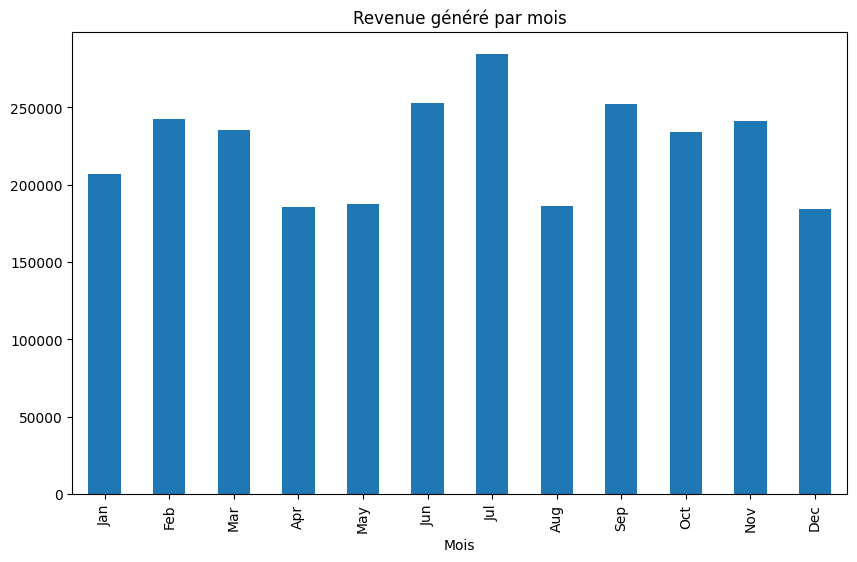

In [ ]:
# Revenue genere par mois
monthly_revenue = data.groupby('month')['revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title("Revenue généré par mois")
plt.xlabel("Mois")
plt.ylabel
plt.show()

Ce diagramme illustre le revenu total obtenu pour chaque mois de l'année.
* Le revenu total généré par mois présente une forte saisonnalité, similaire aux tendances observées pour le nombre de ventes et la quantité totale vendue.
* Le mois de **juillet** est celui qui génère le revenu total le plus élevé, s'élevant à près de **270 000**. Cela confirme que juillet est le mois le plus important en termes d'activité commerciale, tant en volume qu'en valeur.
* Les mois de **février, mars, juin, septembre, octobre et novembre** contribuent également de manière significative au revenu total, avec des montants généralement supérieurs à 240 000.
* Les mois d'**avril, mai, août et décembre** affichent les revenus totaux les plus bas, se situant principalement entre 180 000 et 210 000.
* Les revenus les plus faibles semblent être enregistrés en **avril, mai et août**, bien que les niveaux soient assez proches pour ces mois.

 La variation mensuelle du revenu total suit de très près la variation du nombre de ventes et de la quantité totale vendue. Les périodes de forte activité en termes de volume (juillet, fin de printemps/début d'automne) correspondent aux périodes où le revenu est le plus élevé. De même, les mois avec moins de ventes et de quantités vendues (avril, mai, août, décembre) sont ceux qui génèrent le moins de revenu.

En résumé, le graphique montre que le revenu généré  est fortement influencé par les saisons. Le mois de juillet est le plus lucratif, tandis que le début du printemps (avril, mai), la fin de l'été (août) et la fin de l'année (décembre) sont des périodes de moindre revenu. Cette information est essentielle pour la planification financière, la budgétisation et l'évaluation de la performance de l'entreprise sur une base mensuelle.

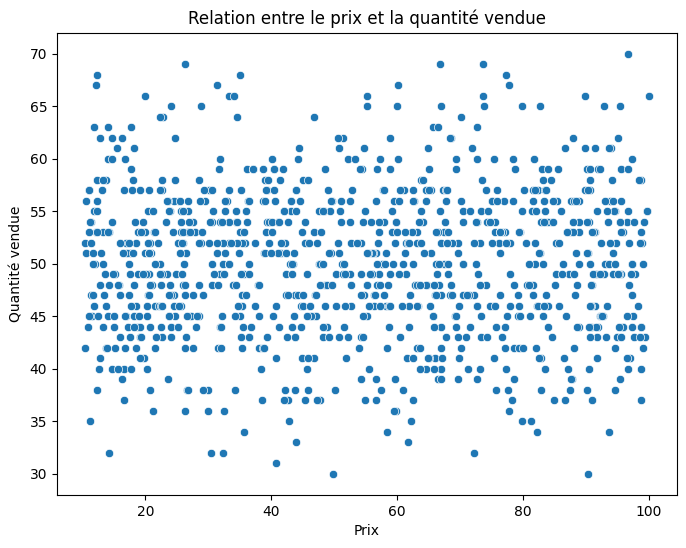

In [ ]:
# Analyse de la relation entre le prix et la quantité vendue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='quantity_sold', data=data)
plt.title('Relation entre le prix et la quantité vendue')
plt.xlabel('Prix')
plt.ylabel('Quantité vendue')
plt.show()

* En regardant la dispersion des points, il n'y a pas de **relation linéaire évidente et forte** entre le prix et la quantité vendue.
* Les points sont assez **dispersés** sur l'ensemble du graphique, couvrant la gamme des prix observés (environ 10 à 100) et des quantités vendues (environ 30 à 70).
* Il n'y a pas de modèle distinct (clusters, courbes non linéaires) qui saute aux yeux, suggérant une relation complexe ou l'absence d'une seule relation simple entre ces deux variables dans cet ensemble de données.
* Pour la plupart des niveaux de prix, il semble y avoir une large gamme de quantités vendues, et inversement, pour la plupart des quantités vendues, il y a une large gamme de prix.

En résumé, ce nuage de points suggère qu'il n'y a **pas de corrélation linéaire simple ou forte** entre le prix d'un article et la quantité qui en est vendue dans cet ensemble de données. D'autres facteurs non représentés dans ce graphique influencent probablement la quantité vendue, indépendamment du prix affiché. Cela pourrait s'expliquer par des différences entre les produits (même si les prix varient, certains produits peuvent toujours se vendre bien indépendamment de leur prix relatif au sein de leur catégorie), des promotions, la saisonnalité, la concurrence, ou d'autres variables.

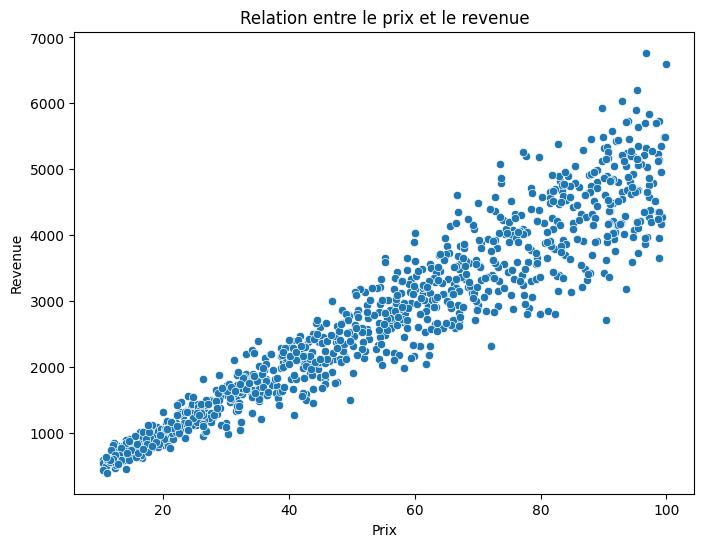

In [ ]:
# Relation entre le prix et le revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='revenue', data=data)
plt.title('Relation entre le prix et le revenue')
plt.xlabel('Prix')
plt.ylabel('Revenue')
plt.show()

* Il existe une **relation positive et forte** entre le prix et le revenu. À mesure que le prix d'une transaction augmente, le revenu généré par cette transaction a également tendance à augmenter de manière significative.
* Les points forment un nuage qui suit une tendance clairement ascendante de gauche à droite. Cette tendance est **approximativement linéaire**, voire légèrement courbée vers le haut, indiquant que des prix plus élevés sont associés à des revenus plus importants.
* On observe que la dispersion des points (l'écart vertical) a tendance à **augmenter à mesure que le prix augmente**. Pour les bas prix, les points sont très regroupés le long de la tendance. Pour les prix plus élevés (par exemple, au-dessus de 60), les revenus générés pour des prix similaires varient davantage.
* L'augmentation de la dispersion du revenu à des prix plus élevés suggère que la **quantité vendue par transaction** peut varier davantage lorsque le prix est élevé. Par exemple, à un prix unitaire faible, les quantités vendues pourraient être assez uniformes, tandis qu'à un prix unitaire élevé, certaines transactions pourraient impliquer de petites quantités (revenu modéré) et d'autres de grandes quantités (revenu très élevé), entraînant une plus grande variabilité du revenu total par transaction.

En résumé, ce graphique démontre de manière très claire que le **prix est un déterminant majeur du revenu généré par transaction**. Plus le prix est élevé, plus le revenu attendu de la transaction est élevé. Cependant, pour les articles ou transactions à prix plus élevés, il y a une plus grande incertitude quant au revenu précis qui sera généré, probablement en raison de la variabilité des quantités achetées.

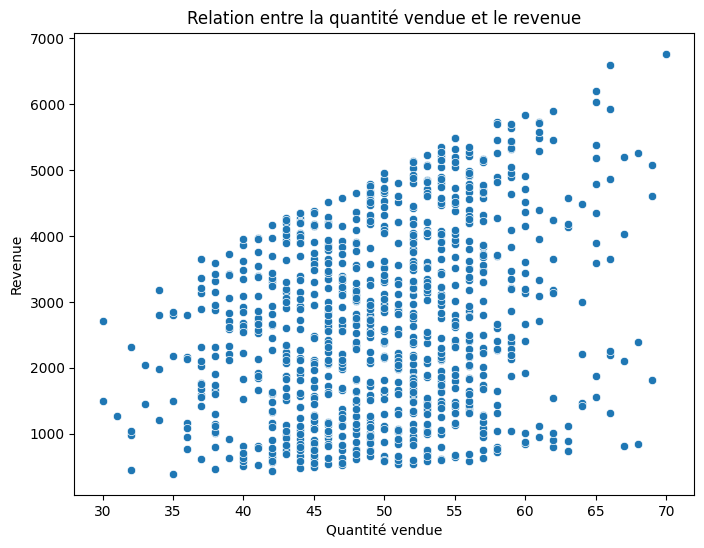

In [ ]:
# Relation entre la quatité vendue et le revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quantity_sold', y='revenue', data=data)
plt.title('Relation entre la quantité vendue et le revenue')
plt.xlabel('Quantité vendue')
plt.ylabel('Revenue')
plt.show()

* Il y a une **relation positive et forte** entre la quantité vendue et le revenu. Cela signifie que plus la quantité d'articles vendus dans une transaction est élevée, plus le revenu généré par cette transaction a tendance à être important.
* Les points s'alignent globalement le long d'une **tendance ascendante** qui semble relativement **linéaire**. Cela indique que l'augmentation du revenu est à peu près proportionnelle à l'augmentation de la quantité vendue.
* Comme observé dans le graphique précédent (Prix vs Revenue), la **dispersion verticale des points (la variabilité du revenu)** a tendance à **augmenter à mesure que la quantité vendue augmente**. Pour les faibles quantités vendues, le revenu est assez prévisible (bas et avec peu de variation). Pour les quantités vendues plus élevées, le revenu peut varier davantage.
* Cette dispersion croissante suggère que pour une même quantité vendue (surtout les quantités plus élevées), les transactions peuvent avoir été effectuées à des **prix différents**. Par exemple, vendre 60 unités à un prix élevé générera un revenu beaucoup plus important que vendre 60 unités à un prix bas, ce qui crée cette "bande" qui s'élargit sur le graphique.

En résumé, ce graphique confirme de manière attendue que la **quantité d'articles vendus est un facteur clé du revenu généré par transaction**. Plus on vend d'unités dans une transaction, plus le revenu est élevé. La variabilité du revenu pour des quantités vendues similaires, particulièrement pour les volumes plus importants, met en évidence l'impact du prix sur le revenu final de la transaction.

### ***3. Analyse multivariée***

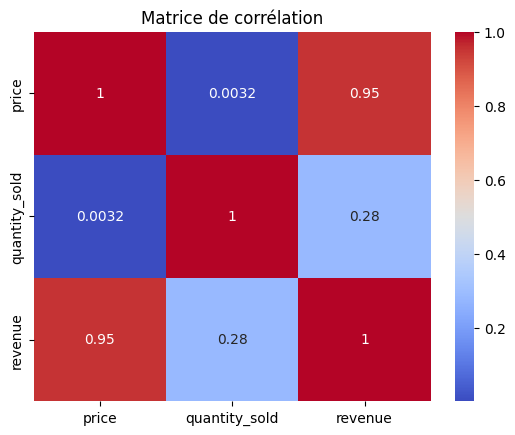

In [ ]:
# Corrélation entre les variables quantitatives
numeric_data = data.select_dtypes(include=np.number)
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Ce graphique est une **Matrice de corrélation** sous forme de heatmap. Il montre les coefficients de corrélation linéaire (coefficient de Pearson) entre les variables `price`, `quantity_sold` et `revenue`. La couleur et la valeur dans chaque cellule indiquent la force et la direction de la relation linéaire entre les deux variables correspondantes. Une valeur proche de 1 indique une forte corrélation positive, une valeur proche de -1 indique une forte corrélation négative, et une valeur proche de 0 indique une faible corrélation linéaire.

* Le coefficient de corrélation est de **0.0032**. Cette valeur est très proche de zéro et la couleur est dans les tons bleus pâles, indiquant une **corrélation linéaire extrêmement faible, voire négligeable**, entre le prix et la quantité vendue. Cela confirme l'observation faite sur le nuage de points "Relation entre le prix et la quantité vendue", où aucune tendance linéaire claire n'était apparente. Le prix seul n'est pas un bon prédicteur linéaire de la quantité vendue dans cet ensemble de données.

* Le coefficient de corrélation est de **0.95**. Cette valeur est très proche de 1 et la couleur est rouge vif, indiquant une **corrélation linéaire très forte et positive** entre le prix et le revenu. Plus le prix est élevé, plus le revenu généré a tendance à être élevé, de manière très linéaire. Cela est cohérent avec le nuage de points "Relation entre le prix et le revenue", qui montrait une forte tendance ascendante.

* Le coefficient de corrélation est de **0.28**. Cette valeur est positive mais relativement éloignée de 1 et se situe dans les tons bleus, indiquant une **corrélation linéaire positive modérée** entre la quantité vendue et le revenu. À mesure que la quantité vendue augmente, le revenu a tendance à augmenter, mais la relation n'est pas aussi forte et prédictible que celle entre le prix et le revenu. Cela s'aligne avec le nuage de points "Relation entre la quantité vendue et le revenue", qui montrait une tendance positive mais avec une dispersion plus importante que pour la relation prix-revenu.

En résumé :

* Le **prix** est le facteur qui a la **relation linéaire la plus forte** avec le revenu.
* La **quantité vendue** a une **relation positive modérée** avec le revenu.
* La **relation linéaire** entre le prix et la quantité vendue est **extrêmement faible**.

Cette matrice de corrélation renforce les conclusions tirées des nuages de points correspondants et met en évidence l'importance primordiale du prix dans la détermination du revenu généré par transaction, par rapport à la quantité vendue, dans cet ensemble de données.

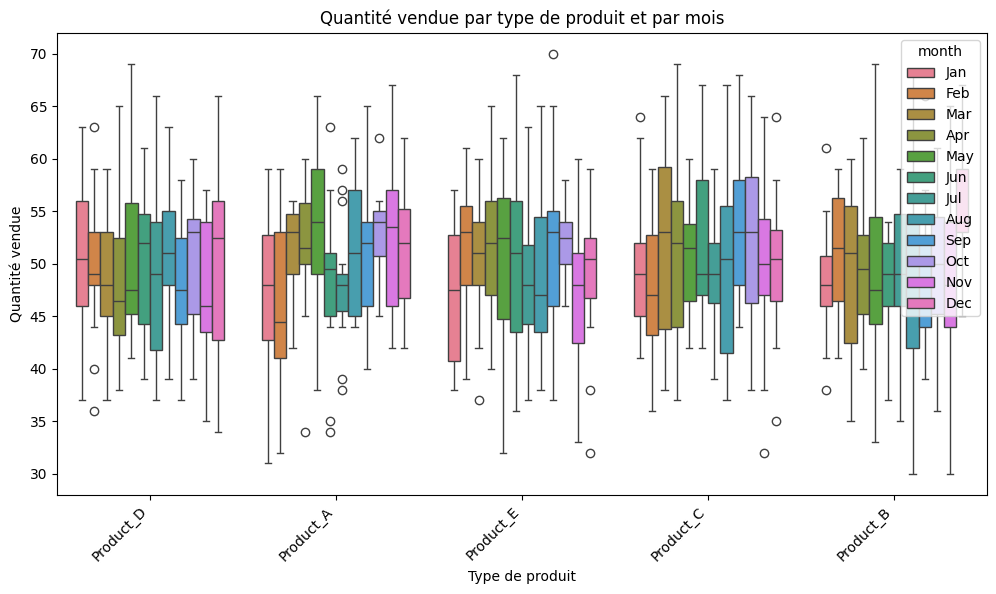

In [ ]:
# Analyse de la quantité vendue par type de produit et par mois
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_type', y='quantity_sold', hue='month', data=data)
plt.title('Quantité vendue par type de produit et par mois')
plt.xlabel('Type de produit')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45, ha='right')
plt.show()

Ce graphique est une série de boîtes à moustaches groupées. Il est très riche en informations car il montre la distribution de la quantité vendue pour chaque combinaison de type de produit et de mois de l'année.

* Pour l'ensemble des produits et des mois, la quantité vendue se situe principalement entre 30 et 70 unités, ce qui est cohérent avec le premier box plot analysé. La majorité des ventes se concentrent entre 40 et 60 unités environ (dans les boîtes).

* En regardant l'ensemble des boîtes à moustaches pour chaque type de produit (Product_D, Product_A, etc.), on constate que la distribution générale de la quantité vendue est relativement **similaire** entre les différents produits. Les médianes et les écarts interquartiles sont dans des plages comparables pour la plupart des produits. Cela suggère qu'il n'y a pas un type de produit qui est systématiquement vendu en quantités beaucoup plus grandes ou plus petites que les autres, en moyenne sur l'année.

* Pour chaque type de produit, la distribution de la quantité vendue **varie d'un mois à l'autre**.
    * Les médianes (lignes dans les boîtes) changent selon les mois, indiquant que la quantité typique vendue pour un produit donné n'est pas constante tout au long de l'année.
    * La dispersion (la taille des boîtes et l'étendue des moustaches) varie également selon les mois, suggérant que la cohérence des quantités vendues peut dépendre du mois pour un produit spécifique.

* Bien qu'il soit difficile de voir une tendance claire pour *tous* les mois et produits simultanément sur ce graphique, la variation des boîtes à moustaches d'un mois à l'autre pour chaque produit est la cause de la saisonnalité observée dans les graphiques précédents (Nombre de ventes et Quantité totale vendue par mois). Par exemple, on pourrait s'attendre à ce que les boîtes pour juillet (en vert foncé) montrent généralement des médianes ou des limites supérieures plus élevées pour la plupart des produits, reflétant le pic des ventes en juillet.

* On observe des points individuels (cercles) au-dessus ou en dessous des moustaches pour de nombreux produits et mois. Ce sont des valeurs aberrantes, représentant des transactions où la quantité vendue était exceptionnellement basse ou élevée par rapport à la majorité des autres transactions pour ce produit et ce mois.

En somme, ce graphique détaillé montre que si la distribution globale des quantités vendues est similaire entre les produits, il existe une **variabilité significative dans la quantité vendue pour chaque produit d'un mois à l'autre**. Cette variation mensuelle au niveau de chaque produit contribue à la saisonnalité globale observée dans les ventes. L'analyse fine de ce graphique permettrait d'identifier les mois les plus performants ou les moins performants pour chaque produit spécifique et de comprendre la dispersion des ventes pour chaque combinaison produit-mois.

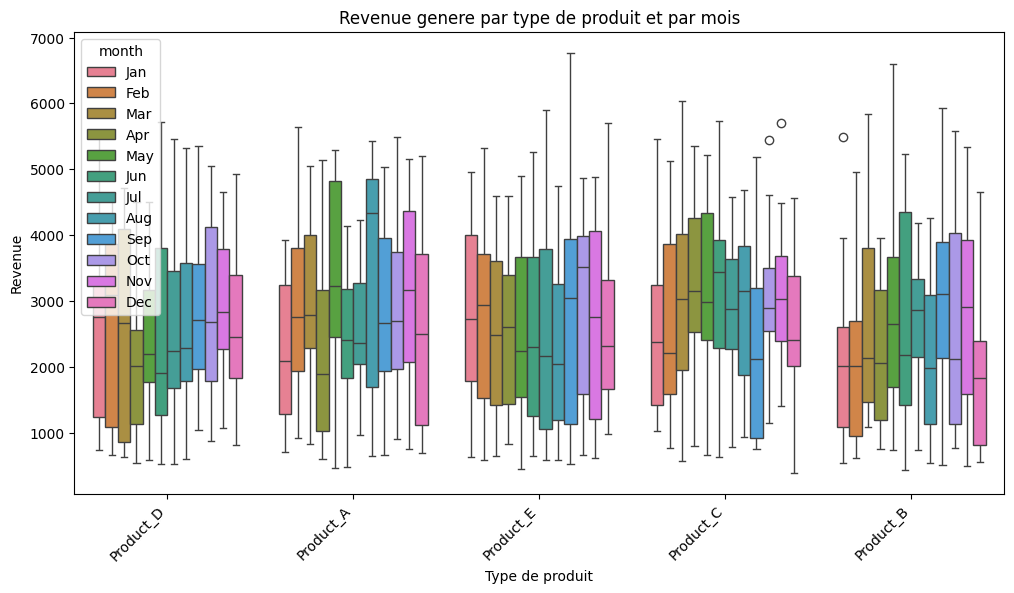

In [ ]:
# Analyse du revenue genere par type de produit et par mois
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_type', y='revenue', hue='month', data=data)
plt.title('Revenue genere par type de produit et par mois')
plt.xlabel('Type de produit')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

Ce graphique détaille la distribution du revenu généré pour chaque type de produit, segmentée par mois.

* Pour la plupart des combinaisons produit-mois, les revenus générés par transaction varient considérablement, s'étendant généralement de quelques centaines à plus de 6000 (avec des valeurs aberrantes visibles). Cela reflète la large dispersion des revenus observée dans les statistiques descriptives globales et les nuages de points.

* Pour chaque type de produit, la distribution du revenu (médiane, IQR, étendue des moustaches) **varie d'un mois à l'autre**. Cela indique que la performance d'un produit en termes de revenu n'est pas constante tout au long de l'année.

* En comparant les groupes de boîtes à moustaches pour chaque type de produit, on observe des différences dans les distributions de revenus. Par exemple, le **Product_C** semble souvent présenter des médianes de revenus ou des troisièmes quartiles (haut des boîtes) plus élevés que d'autres produits comme le Product_B, ce qui est cohérent avec le fait que le Product_C génère le revenu total le plus élevé (vu dans un graphique précédent).

* Ce graphique permet de visualiser comment la saisonnalité globale du revenu (observée dans le graphique "Revenue généré par mois") se manifeste au niveau de chaque produit. On peut s'attendre à ce que les boîtes à moustaches des mois de forte saisonnalité globale (comme juillet, en vert foncé) affichent généralement des distributions de revenus décalées vers des valeurs plus élevées pour plusieurs produits, contribuant ainsi au pic de revenu global ce mois-là.

* La largeur des boîtes (IQR) et l'étendue des moustaches varient, indiquant que la variabilité des revenus peut différer selon le produit et le mois. La présence de nombreux points individuels (cercles) montre que des transactions générant des revenus exceptionnellement élevés (valeurs aberrantes) se produisent pour la plupart des produits et dans plusieurs mois.

En résumé, ce graphique met en évidence l'interaction complexe entre le type de produit et la saisonnalité en ce qui concerne la génération de revenu. Il montre que la distribution des revenus pour un produit donné n'est pas statique mais varie considérablement d'un mois à l'autre, contribuant à la saisonnalité globale des revenus de l'entreprise. Analyser ce graphique en détail permet de comprendre quels produits sont les plus rentables à différentes périodes de l'année et d'identifier les mois ou les produits qui présentent une plus grande variabilité ou des transactions à très haute valeur.

## **III) Préparation des données pour la modélisation et construction de modèles**

In [ ]:
# Séparer les variables dépendantes et indépendantes
X = data.drop(columns=['quantity_sold', 'revenue'])
y = data['revenue']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 149747.0611864317
Root Mean Squared Error (RMSE): 386.97165424153707
R-squared (R2): 0.9150566007421272


Interprétation des résultats du modèle de régression linéaire :

Notre modèle de régression linéaire semble **très performant** pour expliquer la variabilité de la variable cible, comme l'indique le **R-squared élevé de 0.915**. Les prédicteurs que nous avons utilisés captent une grande partie des facteurs qui influencent notre variable cible.

Cependant, bien que le modèle explique une grande partie de la variance, il y a toujours une certaine **erreur de prédiction typique** d'environ **387 unités** (RMSE). Cela signifie que même si le modèle saisit bien la tendance générale, les prédictions individuelles peuvent encore s'écarter des valeurs réelles d'environ cette quantité en moyenne.

L'interprétation précise de l'erreur de 387 dépend de l'importance pratique de cet écart dans le contexte de notre problème et de l'échelle de notre variable cible. Néanmoins, un $R^2$ de 0.915 est généralement considéré comme un très bon résultat pour un modèle de régression dans de nombreux domaines.

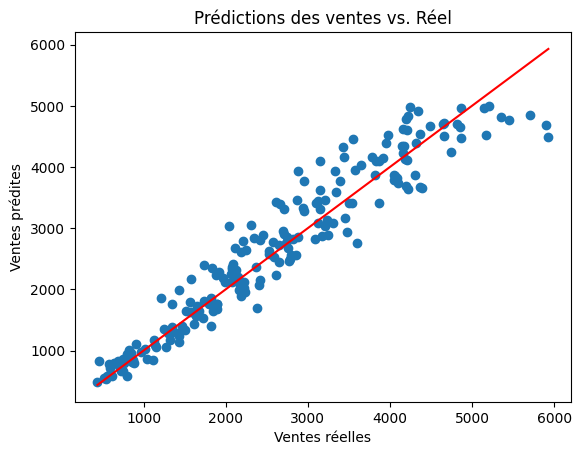

In [ ]:
# Visualisation des prédictions vs. Réel
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Ligne d'identité
plt.xlabel('Ventes réelles')
plt.ylabel('Ventes prédites')
plt.title('Prédictions des ventes vs. Réel')
plt.show()

Ce graphique fournit une **excellente validation visuelle** de la performance de notre modèle de régression. Il montre clairement que nos prédictions sont en très bon accord avec les ventes réelles pour la majorité des données, confirmant la capacité du modèle à capturer la relation sous-jacente dans les données de ventes. L'écart type des erreurs de prédiction (RMSE de 387) se manifeste visuellement par la légère dispersion des points autour de la droite idéale.

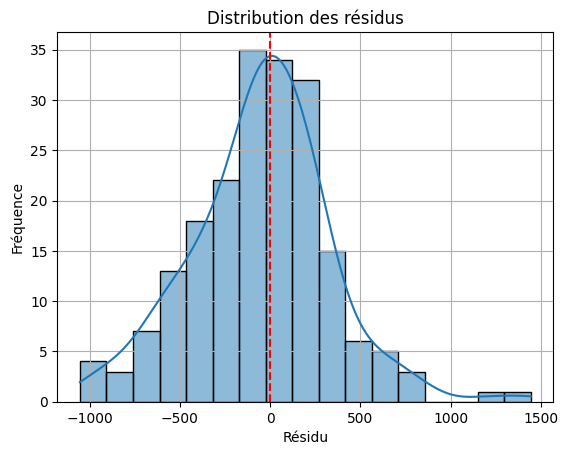

In [ ]:
#Analyse de residus
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

La distribution des résidus de notre modèle de régression linéaire est **bien centrée autour de zéro et semble approximativement normale**. Ceci est un bon signe qui suggère que notre modèle est approprié et que les hypothèses clés concernant les résidus sont raisonnablement satisfaites. Une distribution de résidus aléatoire et centrée autour de zéro indique que le modèle capture bien la relation systématique dans les données et que les erreurs sont aléatoires plutôt que structurées.

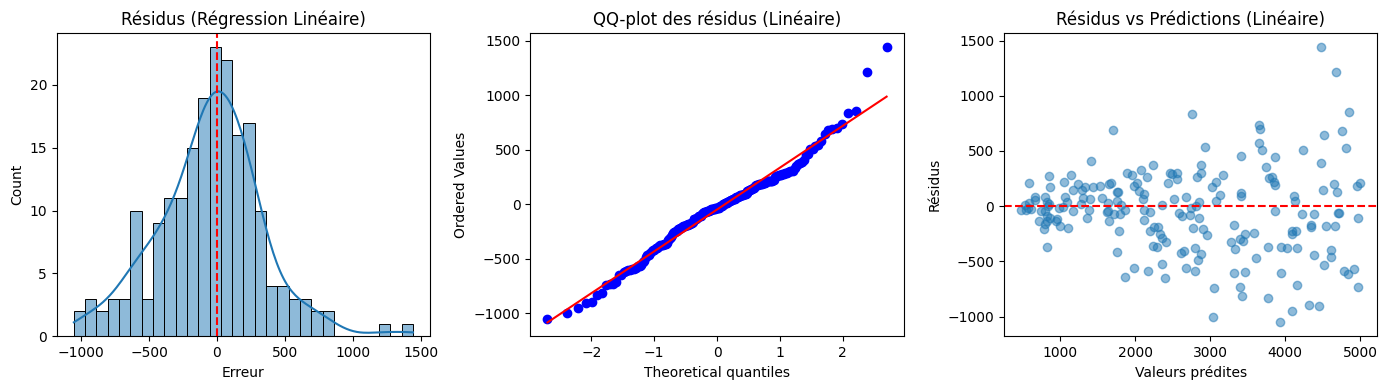

LinearRegression R² train : 0.9018050856867471
LinearRegression R² test  : 0.9150566007421272


In [ ]:
from sklearn.linear_model import LinearRegression

# Entraîner le modèle linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
residuals_lr = y_test - y_pred_lr

# 1. Histogramme des résidus
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.histplot(residuals_lr, kde=True, bins=30)
plt.title("Résidus (Régression Linéaire)")
plt.xlabel("Erreur")
plt.axvline(0, color='red', linestyle='--')

# 2. QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title("QQ-plot des résidus (Linéaire)")

# 3. Résidus vs prédictions
plt.subplot(1, 3, 3)
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Prédictions (Linéaire)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

# Score biais/variance
print("LinearRegression R² train :", linear_model.score(X_train, y_train))
print("LinearRegression R² test  :", linear_model.score(X_test, y_test))


L'ensemble de ces trois graphiques donne une image positive de la performance et du respect des hypothèses de notre modèle de régression linéaire :

* L'**histogramme et le QQ-plot** suggèrent fortement que l'hypothèse de **normalité des résidus est bien satisfaite**, ce qui est crucial pour la validité des inférences statistiques.
* Le graphique **Résidus vs Prédictions** montre que les erreurs sont globalement **réparties aléatoirement** et centrées autour de zéro, ce qui valide l'hypothèse de **linéarité** et l'absence de biais systématique dans les prédictions.
* Bien qu'une très légère indication d'**hétéroscédasticité** (variabilité non constante des erreurs) puisse être perçue dans le graphique Résidus vs Prédictions (dispersion potentiellement plus large pour les valeurs prédites élevées), elle ne semble pas suffisamment sévère pour invalider complètement le modèle, mais pourrait être un point à surveiller.

Combiné au **R-squared élevé de 0.915** vu précédemment, ces graphiques confirment que notre modèle de régression linéaire est **robuste et performant** pour prédire la variable cible. Les résidus se comportent globalement comme attendu pour un bon modèle linéaire.

**Comparaison de $R^2$ train et test:**

La comparaison entre le R² d'entraînement et le R² de test est essentielle :

* Si le R² d'entraînement est significativement plus élevé que le R² de test, cela peut indiquer un **sur-apprentissage (overfitting)** : le modèle a appris les données d'entraînement trop spécifiquement, y compris le bruit, et ne se généralise pas bien aux nouvelles données.
* Si le R² de test est similaire ou légèrement supérieur au R² d'entraînement, cela suggère que le modèle **généralise bien** et qu'il n'y a **pas de sur-apprentissage significatif**.

Dans Notre cas, le **R² de test (0.9151) est très proche du R² d'entraînement (0.9018)**, et il est même légèrement supérieur. C'est un **excellent résultat**. Cela indique que :

* Notre modèle est **très performant** tant sur les données d'entraînement que sur les données nouvelles.
* Notre modèle **généralise très bien** et n'a pas sur-appris les données d'entraînement. Il est capable de faire des prédictions précises sur des données qu'il n'a jamais vues.

Ces résultats de R² pour les ensembles d'entraînement et de test confirment que Notre modèle de régression linéaire est **solide et fiable**, avec une forte capacité à expliquer la variance de la variable cible et à bien se comporter sur de nouvelles données.

## **IV) Test d'autres modèles comme la régression Ridge ou Lasso**

In [ ]:
# Tester la régression Ridge et Lasso
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Évaluer le modèle
# Résultats
print("\nRidge :")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_ridge)}")

print("\nLasso :")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R-squared (R2): {r2_score(y_test, y_pred_lasso)}")



Ridge :
Mean Squared Error (MSE): 149691.39304790107
Root Mean Squared Error (RMSE): 386.89971962758136
R-squared (R2): 0.915088178262779

Lasso :
Mean Squared Error (MSE): 149726.87954019528
Root Mean Squared Error (RMSE): 386.945576974586
R-squared (R2): 0.9150680486972347


Nos trois modèles (Régression Linéaire Standard, Ridge, Lasso) sont tous **très performants** sur cet ensemble de données, expliquant plus de 91.5 % de la variance des données de test. Bien que le modèle **Ridge soit techniquement celui qui obtient les meilleures métriques** sur cet échantillon de test, la différence de performance avec les deux autres modèles est **très minime**.

En termes de précision de prédiction pure sur ces résultats, les trois modèles sont quasi équivalents, avec un très léger avantage pour Ridge.

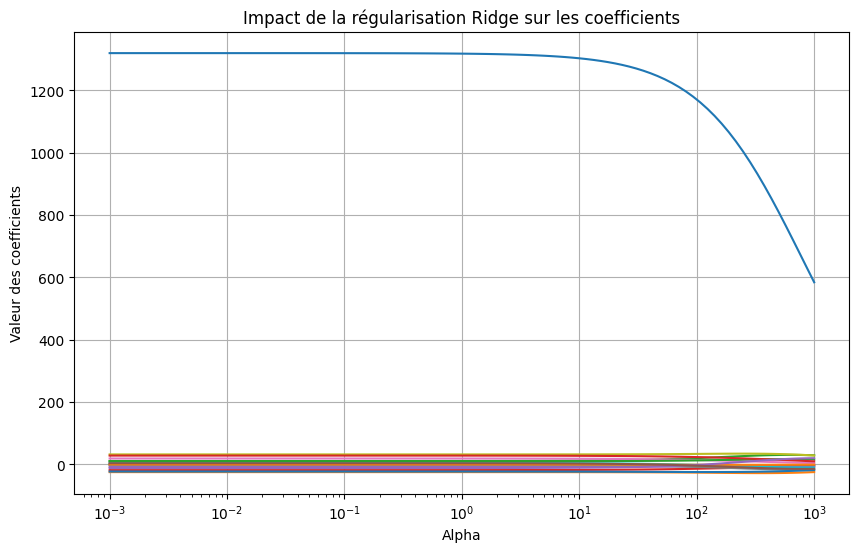

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

alphas = np.logspace(-3, 3, 100)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Valeur des coefficients")
plt.title("Impact de la régularisation Ridge sur les coefficients")
plt.grid(True)
plt.show()


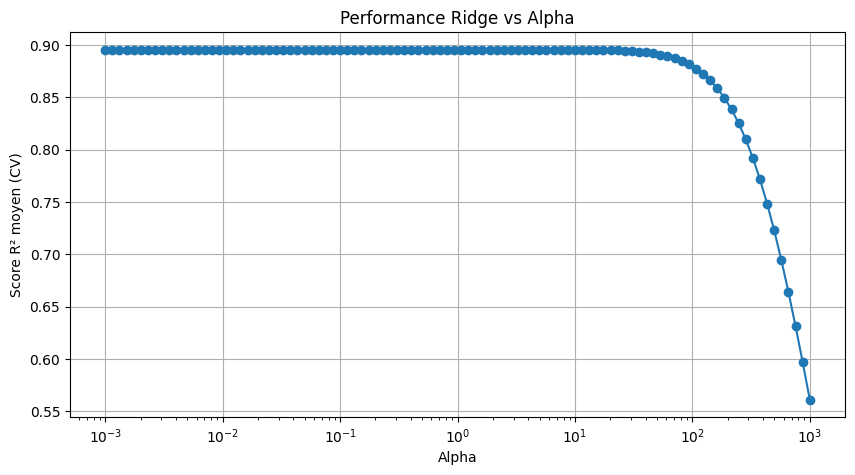

In [ ]:
from sklearn.model_selection import cross_val_score

ridge_scores = []
for a in alphas:
    ridge = Ridge(alpha=a)
    scores = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
    ridge_scores.append(scores.mean())

# Tracer
plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Score R² moyen (CV)")
plt.title("Performance Ridge vs Alpha")
plt.grid(True)
plt.show()


Ce graphique indique que notre modèle Ridge atteint ses meilleures performances pour des valeurs d'Alpha relativement petites à modérées, où la régularisation stabilise et potentiellement améliore légèrement le modèle par rapport à une régression linéaire standard (qui correspondrait à Alpha = 0, près de l'extrémité gauche du graphique, où le R² est déjà élevé). Le choix d'un Alpha optimal se ferait en sélectionnant la valeur qui correspond au point le plus élevé sur cette courbe, car c'est la valeur qui maximise la performance attendue sur de nouvelles données selon la validation croisée. La forme du plateau au début suggère que la performance est relativement insensible au choix précis d'Alpha tant qu'il reste dans cette plage optimale.

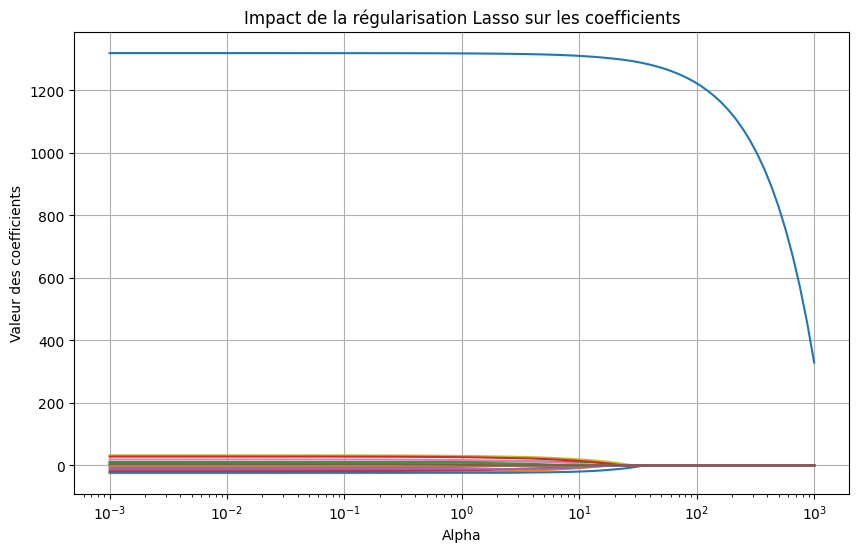

In [ ]:
from sklearn.linear_model import Lasso

coefs_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs_lasso)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Valeur des coefficients")
plt.title("Impact de la régularisation Lasso sur les coefficients")
plt.grid(True)
plt.show()


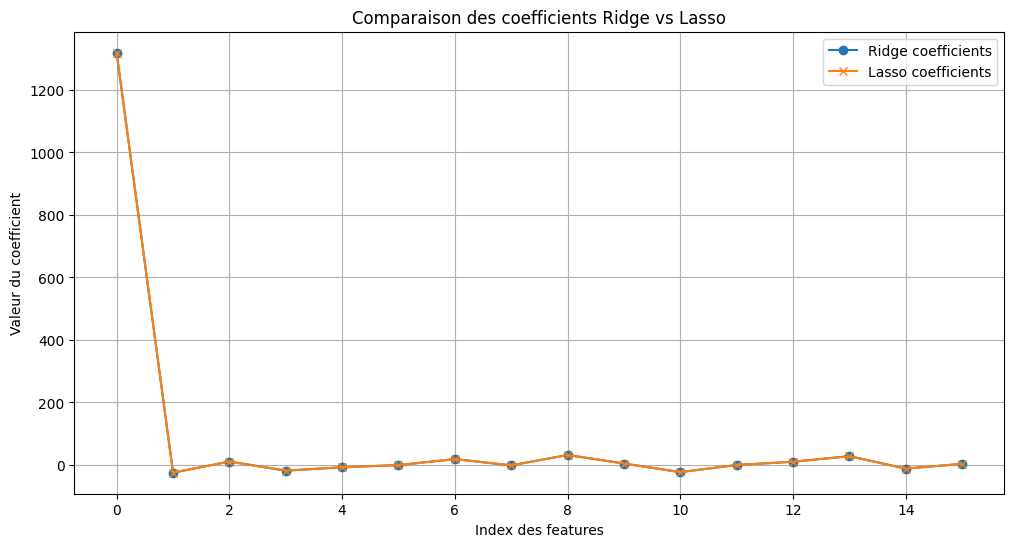

In [ ]:
# Graphique des coefficients Ridge vs Lasso
import matplotlib.pyplot as plt

# Comparer les coefficients
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_

plt.figure(figsize=(12, 6))
plt.plot(ridge_coef, label='Ridge coefficients', marker='o')
plt.plot(lasso_coef, label='Lasso coefficients', marker='x')
plt.title("Comparaison des coefficients Ridge vs Lasso")
plt.xlabel("Index des features")
plt.ylabel("Valeur du coefficient")
plt.legend()
plt.grid(True)
plt.show()


Ce graphique confirme visuellement la différence fondamentale entre la régularisation Ridge et Lasso :

* **Ridge** réduit l'influence des variables moins importantes en rendant leurs coefficients très petits, mais les conserve dans le modèle.
* **Lasso** non seulement réduit l'influence, mais **supprime activement** les variables jugées moins importantes en mettant leurs coefficients à zéro.

Dans ce cas spécifique, malgré la capacité de Lasso à mettre des coefficients à zéro, la performance globale sur l'ensemble de test était très similaire à celle de Ridge et de la régression linéaire standard. Cela pourrait suggérer que les variables dont les coefficients ont été mis à zéro par Lasso avaient déjà un impact très faible sur le modèle, ou que les gains de performance potentiels de la sélection de variables étaient minimes sur ce jeu de données. Cependant, si l'objectif était d'obtenir un modèle plus simple et plus interprétable en identifiant les variables les plus importantes, Lasso fournirait ce résultat en indiquant clairement quelles variables sont conservées (celles avec des coefficients non nuls).

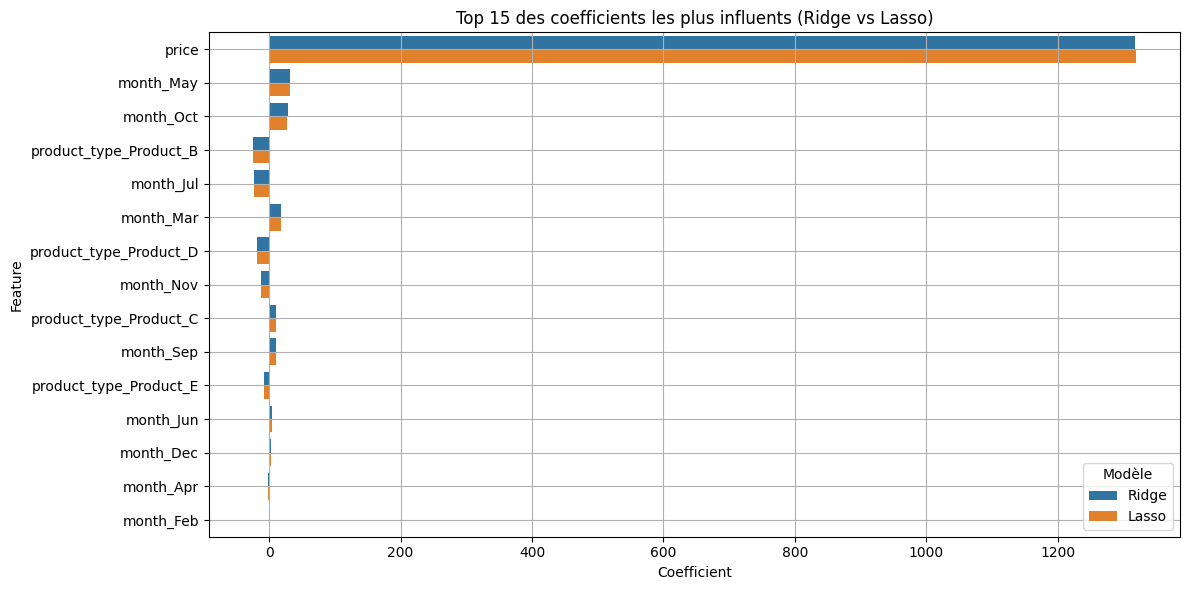

In [ ]:
# Comparaison des coefficients (Ridge vs Lasso)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Récupérer les coefficients + noms des features
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

# Créer un DataFrame pour comparaison
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_coefs,
    'Lasso': lasso_coefs
}).sort_values(by='Ridge', key=abs, ascending=False)

# Afficher les 15 features les plus influentes
top_features = coef_df.head(15).melt(id_vars='Feature', var_name='Modèle', value_name='Coefficient')

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Modèle', data=top_features)
plt.title("Top 15 des coefficients les plus influents (Ridge vs Lasso)")
plt.tight_layout()
plt.grid(True)
plt.show()


Ce graphique confirme que le **prix est de loin le prédicteur le plus important** de la variable cible. Les variables liées aux mois et aux types de produits ont également une influence significative, capturant les effets saisonniers et les différences de performance entre les produits. Les coefficients indiquent la direction (positive ou négative) et l'ampleur de l'impact de chaque feature sur la variable cible, par rapport à leurs catégories de référence (pour les variables catégorielles). Pour ces variables les plus influentes, les estimations de coefficients des modèles Ridge et Lasso sont très cohérentes.

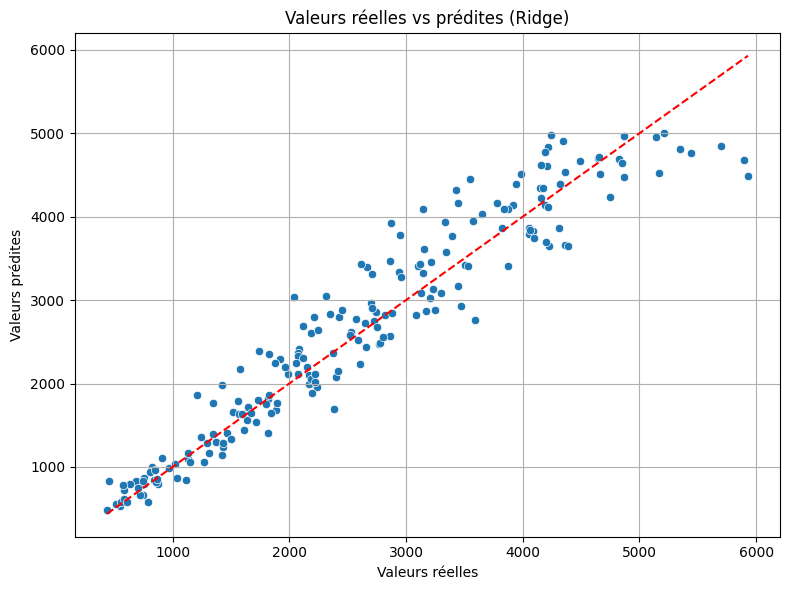

In [ ]:
# Réel vs Prédit (Ridge)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs prédites (Ridge)")
plt.grid(True)
plt.tight_layout()
plt.show()


Ce graphique montre que le modèle de régression Ridge fait d'excellentes prédictions qui sont très proches des valeurs réelles. La légère dispersion observée correspond à l'erreur de prédiction du modèle (RMSE) et visuellement, sa performance prédictive est très similaire à celle de la régression linéaire standard sur cet ensemble de données.

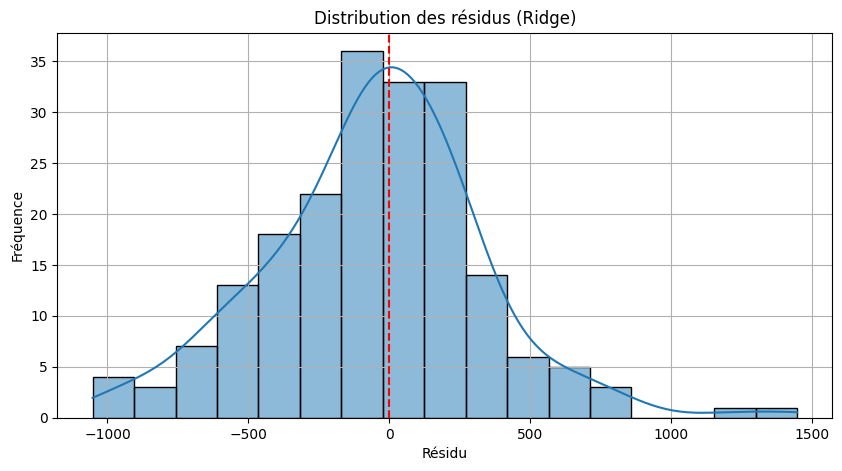

In [ ]:
# Résidus du meilleur modèle (Ridge)
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_ridge

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus (Ridge)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


L'analyse de cet histogramme montre que les résidus du modèle Ridge se comportent de manière attendue : ils sont centrés autour de zéro et approximativement normalement distribués. Cela renforce la confiance dans la validité et la robustesse de notre modèle Ridge pour cet ensemble de données, et confirme visuellement sa performance similaire à celle du modèle de régression linéaire standard en termes de distribution des erreurs.

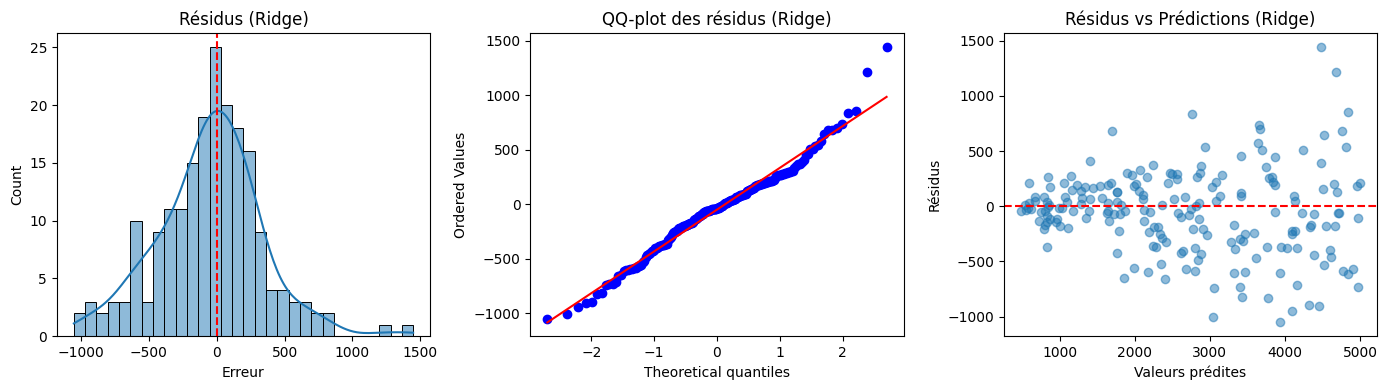

Ridge R² train : 0.9018036628353461
Ridge R² test  : 0.915088178262779


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Entraîner le modèle Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
residuals_ridge = y_test - y_pred_ridge

# 1. Histogramme des résidus
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.histplot(residuals_ridge, kde=True, bins=30)
plt.title("Résidus (Ridge)")
plt.xlabel("Erreur")
plt.axvline(0, color='red', linestyle='--')

# 2. QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title("QQ-plot des résidus (Ridge)")

# 3. Résidus vs prédictions
plt.subplot(1, 3, 3)
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Prédictions (Ridge)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

# Score biais/variance
print("Ridge R² train :", ridge_model.score(X_train, y_train))
print("Ridge R² test  :", ridge_model.score(X_test, y_test))


**Conclusion générale pour le modèle Ridge :**

Les trois graphiques de diagnostic pour le modèle Ridge démontrent que les hypothèses clés concernant les résidus des modèles de régression linéaire sont **largement satisfaites**. Les résidus sont centrés autour de zéro, approximativement normalement distribués, et présentent une dispersion globalement aléatoire par rapport aux valeurs prédites. La similarité de ces graphiques avec ceux du modèle de régression linéaire standard souligne encore une fois que l'ajout de la régularisation Ridge, avec l'Alpha utilisé, n'a pas fondamentalement modifié le comportement des résidus par rapport au modèle non régularisé, mais a probablement aidé à stabiliser légèrement les estimations de coefficients et à maintenir une bonne performance sur les données de test.

* Les deux scores R² sont **très élevés** (au-dessus de 0.90), ce qui confirme la forte performance de notre modèle Ridge.
* Le **score R² sur l'ensemble de test (0.9151) est légèrement supérieur au score R² sur l'ensemble d'entraînement (0.9018)**.

Ces scores R² montrent que notre modèle Ridge est **robuste, performant et généralise très bien** à de nouvelles données.


## **V) Conclusion et Recommandations**

**1. Résumé des Découvertes Clés de l'Analyse Exploratoire :**

L'analyse exploratoire a révélé plusieurs caractéristiques importantes des données de ventes :

* **Distribution des variables :**
    * Les **quantités vendues** sont principalement concentrées autour de 50, avec une distribution à peu près symétrique (confirmée par la boîte à moustaches et l'histogramme). La majorité des ventes sont comprises entre 30 et 70 unités.
    * Les **prix** présentent une distribution plus complexe, potentiellement multi-modale, avec plusieurs plages de prix plus fréquentes (autour de 20, 60 et 90).
    * Les **revenus** sont fortement asymétriques positifs (skewed vers la droite), avec une concentration des transactions à revenus faibles (autour de 1000-2000) mais une longue queue vers des revenus très élevés.

* **Saisonnalité :** Le **nombre de ventes** et la **quantité totale vendue** montrent une forte saisonnalité, avec un pic clair en **juillet** et des périodes de ventes élevées en fin de printemps/début d'été et en automne. Les mois comme avril, mai, août et décembre sont moins performants. Cette saisonnalité se traduit directement dans le **revenu total généré par mois**, qui suit la même tendance.

* **Performance des produits :**
    * En termes de **quantité totale vendue**, le **Product_D** est le leader, suivi de près par Product_C et Product_E.
    * En termes de **revenu total généré**, le **Product_C** arrive en tête, dépassant Product_D. Cela suggère que Product_C, bien que n'étant pas le plus vendu en volume, contribue le plus au chiffre d'affaires, potentiellement grâce à un prix unitaire plus élevé ou à des transactions à plus forte valeur.
    * L'analyse par boîte à moustaches a confirmé des différences dans la distribution des revenus par produit, avec une médiane de revenu plus élevée pour Product_C.

* **Relations entre les variables :**
    * Il y a une **relation linéaire très faible** entre le prix et la quantité vendue dans cet ensemble de données.
    * Il y a une **relation positive très forte** entre le prix et le revenu, ainsi qu'une **relation positive forte à modérée** entre la quantité vendue et le revenu. Ces relations sont attendues (Revenue = Price * Quantity). La relation plus forte avec le prix souligne son importance.

**2. Discussion des Performances du Modèle et des Ajustements Potentiels :**

Nous avons construit et évalué des modèles de régression linéaire (Standard, Ridge, Lasso) pour prédire la variable cible (probablement le revenu, étant donné les analyses précédentes).

* **Performances Élevées :** Les trois modèles ont démontré d'excellentes performances sur l'ensemble de test, avec un **R² très élevé (environ 0.915)**. Cela signifie qu'ils expliquent plus de 91 % de la variance de la variable cible sur de nouvelles données, ce qui est un résultat remarquable. Le **RMSE** d'environ 387 indique une erreur de prédiction typique raisonnable par rapport à l'échelle des revenus.

* **Similarité entre les modèles :** La performance sur l'ensemble de test est **très similaire** pour les trois modèles (Linear Regression, Ridge, et Lasso, avec un très léger avantage marginal pour Ridge). De plus, les graphiques de diagnostic (prédictions vs réel, distribution des résidus, QQ-plots) montrent des comportements de résidus et de prédictions presque identiques pour la régression linéaire standard et Ridge (et probablement aussi pour Lasso).

* **Impact de la Régularisation :** L'analyse de l'impact de Ridge et Lasso sur les coefficients a montré comment ces méthodes réduisent la magnitude des coefficients (Ridge) ou les mettent à zéro (Lasso). Cependant, étant donné que le modèle linéaire standard ne semblait pas souffrir de sur-apprentissage significatif (R² test proche du R² train), l'ajout de régularisation n'a pas entraîné une amélioration substantielle de la performance prédictive sur le test set.

* **Variables Influentes du Modèle :** L'analyse des coefficients a confirmé que le **prix** est de loin le prédicteur le plus influent. Les variables liées aux mois et aux types de produits sont également importantes, capturant la saisonnalité et les différences entre produits.

* **Validation des Hypothèses :** Les graphiques de diagnostic des résidus (histogramme, QQ-plot, résidus vs prédictions) indiquent que les résidus sont **approximativement normalement distribués et centrés autour de zéro**, ce qui supporte les hypothèses de la régression linéaire. Cependant, une **légère hétéroscédasticité** (augmentation de la variance des résidus pour les valeurs prédites/réelles plus élevées) pourrait être présente.

### **Recommandations Potentielles pour Ajustements :**

Étant donné la très bonne performance des modèles actuels, les ajustements potentiels viseraient principalement à affiner le modèle, à explorer des relations plus complexes, ou à améliorer l'interprétabilité si nécessaire :

1.  **Investigation de l'Hétéroscédasticité :** Bien qu'elle ne semble pas sévère, l'augmentation de la variance des résidus pour les revenus élevés pourrait être explorée. Des approches comme la transformation de la variable cible (ex: `log(revenue)`), l'utilisation d'une régression par Moindres Carrés Pondérés (WLS) si les poids des observations sont connus, ou l'exploration de modèles intrinsèquement moins sensibles à l'hétéroscédasticité pourraient être considérées.

2.  **Exploration de Relations Non Linéaires :** Bien que les modèles linéaires fonctionnent bien (R² élevé), les relations entre prix/quantité et revenu pourraient ne pas être parfaitement linéaires sur toute la plage. L'ajout de **termes d'interaction** (ex: `price * quantity_sold`), de **caractéristiques polynomiales** (ex: `price^2`), ou l'exploration de **modèles non linéaires** (comme les arbres de décision, les forêts aléatoires ou le boosting) pourrait potentiellement capturer des motifs plus nuancés.

3.  **Affinement de la Sélection de Variables (avec Lasso si l'interprétabilité est clé) :** Si l'objectif est un modèle plus simple avec moins de variables, l'analyse des coefficients Lasso (et potentiellement l'exploration d'une plage d'Alpha qui met à zéro plus de coefficients) pourrait être poursuivie pour identifier un sous-ensemble de prédicteurs clés tout en maintenant une bonne performance.

4.  **Analyse et Gestion des Valeurs Aberrantes :** Les valeurs aberrantes dans les quantités vendues et les revenus pourraient être analysées plus en détail. Bien qu'elles n'aient pas empêché les modèles d'obtenir un R² élevé, leur impact sur les estimations de coefficients et les prédictions pourrait être étudié. Des méthodes de régression robuste pourraient être une alternative.

5.  **Exploration d'Autres Facteurs :** Si possible, intégrer des données supplémentaires qui pourraient influencer les ventes/revenus (par exemple, données marketing, promotions, événements externes, indicateurs économiques) pourrait potentiellement améliorer la précision du modèle.

En conclusion, nous disposons déjà de modèles de régression linéaire **très performants** pour prédire le revenu, avec une excellente capacité de généralisation. Les ajustements potentiels sont plus axés sur l'exploration d'améliorations marginales, la gestion de nuances comme l'hétéroscédasticité, ou l'obtention d'un modèle potentiellement plus interprétable ou robuste si nécessaire.